### Summary :
This notebook explores a Logistic Regression and Decision Tree base models, as well as with various SMOTE variations, and Decision Tree and Random Forest models with hyperparameter tuning and PCA, to predict `Alcohol` usage. The performance of these models is evaluated using confusion matrices and classification reports.

# INDEX
- [Logistic Regression](#logreg)
- [Coefficient analysis](#Coef)
- [Logistic Regression with SMOTE variations and Confusion Matrix](#logreg_smote)
- [Decision Tree](#DT)
- [Decision Tree and Random Forest with PCA](#DTRM)
- [Models Comparison](#Models)
<a id='INDEX'></a>

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from scipy.stats import chi2_contingency,ttest_ind
from sklearn.model_selection import train_test_split


In [2]:
df = pd.read_csv('drug_consumption_model_ready.csv')

I am trying to predict the likelihood of `Alcohol` use based on patterns of other drug usage. Going to try Logistic Regression, Decision Tree and Random Forest with PCA and pipeline.

In [3]:
# Split the data into train and test with 75% volume in training dataset and 25% in testing dataset

X = df.drop(['Alcohol','Unnamed: 0'],axis=1)
y = df['Alcohol']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=42)


### Logistic Regression <a id='logreg'></a>

In [4]:
from sklearn.linear_model import LogisticRegression

# Instantiate logistic regression models
logreg = LogisticRegression()

# Fit models separately on positive and negative reviews
logreg.fit(X_train, y_train)


# Print train and test scores for both models
print((f"Train score: {logreg.score(X_train, y_train)}")) 
print(f"Test score: {logreg.score(X_test, y_test)}")

Train score: 0.8334524660471766
Test score: 0.7987152034261242


/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### Coefficient analysis <a id='Coef'></a>

In [5]:
#The intercept
intercept = np.exp(logreg.intercept_)

#The coefficients return an array with one entry for each feature. 
#Since this is logistic regression, the coefficients can be interpreted by exponentiating them
coefficient = np.exp(logreg.coef_[0])


print(f'Intercept: {intercept}')
print(f'Coefficients: {coefficient}')

Intercept: [0.79098753]
Coefficients: [0.99704829 1.02624041 1.00086217 0.99234675 0.9991637  0.97417175
 1.73666536 0.77893124 1.28617825 1.49180176 1.84951297 1.24650931
 1.41360594 1.50336278 1.23816422 1.49461971 0.77506062 1.26959686
 0.77656513 1.23256603 0.72328405 1.33938233 1.01640092 1.01057397
 1.00702717 0.95579335 0.83327516 1.54071392 0.7829185  0.76595035
 0.9335514  0.68272553 1.74266813 0.78097823 0.80391076 1.23613932
 1.49810378 1.01072646 0.99904636 0.89928934 0.81308534 0.72003845
 0.91683449 0.79271675 1.03274118 0.98923894 0.82878601 1.60241361
 0.80766958]


<Figure size 640x480 with 0 Axes>

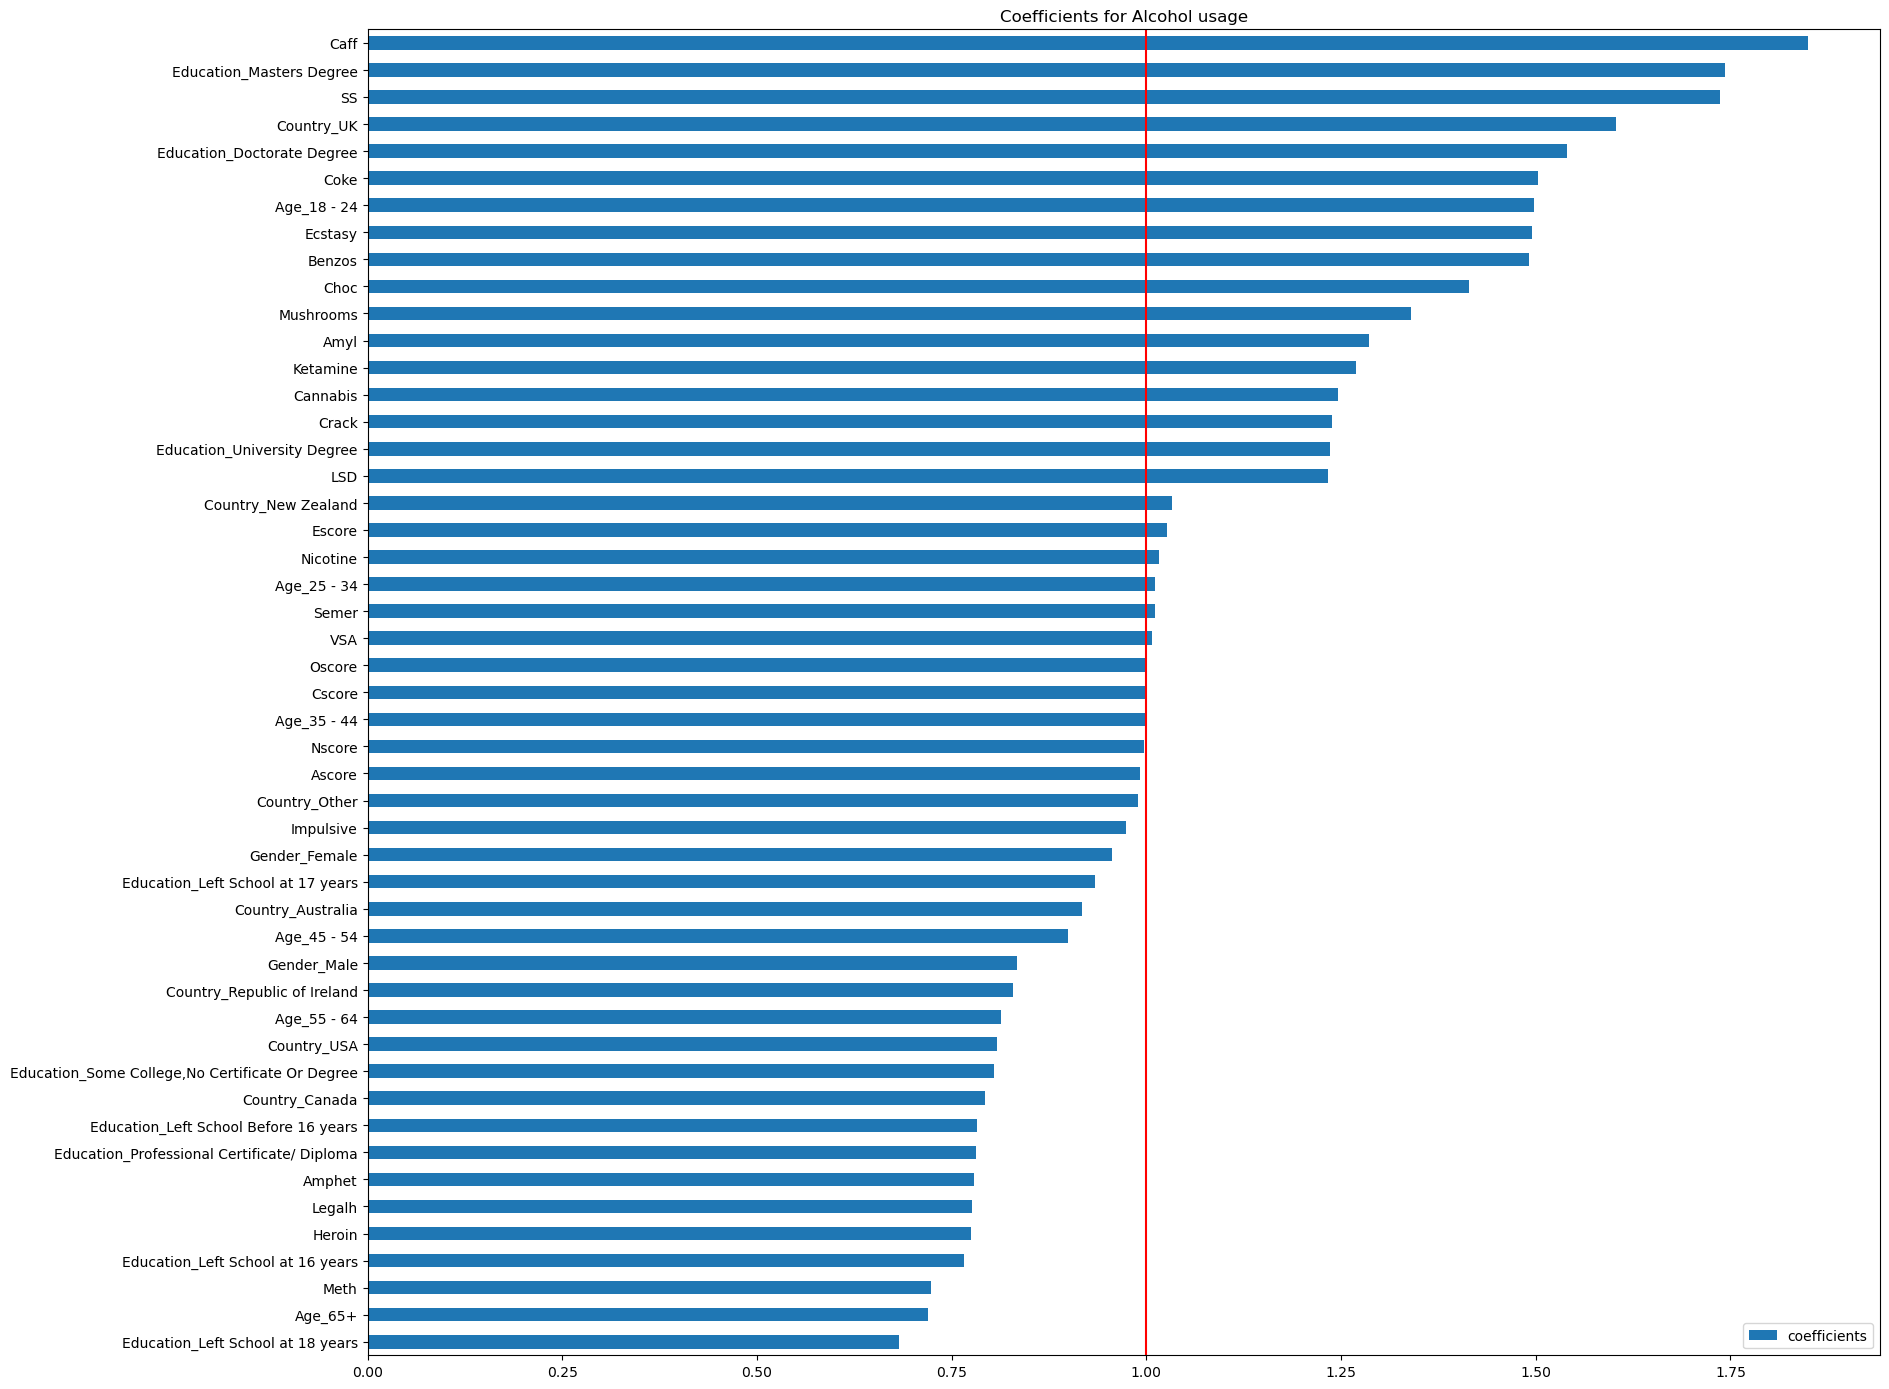

In [6]:
plt.figure()

#Creating a data frame with sorting by 'coefficients'
df1 = pd.DataFrame(
    data={"coefficients": coefficient},
    index=X_train.columns
).sort_values(by="coefficients")

#Plotting the horizontal bar graph
df1.plot(kind="barh", figsize=(19, 14), title="Coefficients for Alcohol usage")
plt.axvline(1, c='r')
plt.tight_layout()
plt.show()



The analysis of the relationship between various features and Alcohol consumption reveals the top 5 coefficient values in descending order as follows: Caff (1.849513), Education_Masters Degree (1.742668), SS (1.736665), Country_UK (1.602414), and Education_Doctorate Degree (1.540714). These values indicate a strong positive correlation with Alcohol consumption

### Logistic Regression Confusion Matrix <a id='logconf'></a>

array([[  0,  94],
       [  0, 373]])

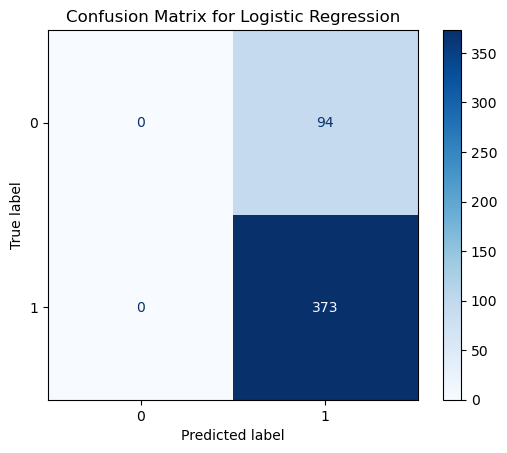

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        94
           1       0.80      1.00      0.89       373

    accuracy                           0.80       467
   macro avg       0.40      0.50      0.44       467
weighted avg       0.64      0.80      0.71       467



/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [8]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Make predictions on the test set
y_pred = logreg.predict(X_test)

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Get class predictions
y_pred = logreg.predict(X_test)

# Generate confusion matrix
logreg_matrix = confusion_matrix(y_test, y_pred)

# label rows and columns
logreg_df = pd.DataFrame(
    logreg_matrix,
    columns=["Predicted Non-user", "Predicted User"],
    index=["True Non-User", "True User"]
)


display(logreg_matrix)

# Evaluate the model
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix for Logistic Regression")
plt.show()

from sklearn.metrics import classification_report

report_initial = classification_report(y_test, y_pred)
print(report_initial)

#### Summary
The Logistic Regression (Base) model achieved a train score of 0.833 and a test score of 0.799, indicating good generalization from training to test data. The model's precision and recall for class 1 were both high, with precision at 0.80 and recall at 1.00, leading to an F1-score of 0.89. However, the model performed poorly for class 0, with precision, recall, and F1-score all at 0.00. The overall accuracy of the model was 0.80, but the macro average F1-score was only 0.44, reflecting the imbalance in performance across classes. The weighted average F1-score was 0.71, showing a better performance weighted by support but still highlighting the need for improvement in handling class 0 predictions.

### Logistic Regression with SMOTE variations <a id='logreg_smote'></a>

Results for BorderlineSMOTE:
Best parameters for Logistic Regression:  {'model__C': 0.1}
Best cross-validation score for Logistic Regression: 0.63
Test set score for Logistic Regression: 0.60

Confusion Matrix:
 [[ 45  49]
 [139 234]]



Confusion Report:
               precision    recall  f1-score   support

           0       0.24      0.48      0.32        94
           1       0.83      0.63      0.71       373

    accuracy                           0.60       467
   macro avg       0.54      0.55      0.52       467
weighted avg       0.71      0.60      0.63       467



Results for SMOTEN:
Best parameters for Logistic Regression:  {'model__C': 10}
Best cross-validation score for Logistic Regression: 0.81
Test set score for Logistic Regression: 0.79

Confusion Matrix:
 [[  5  89]
 [ 11 362]]



Confusion Report:
               precision    recall  f1-score   support

           0       0.31      0.05      0.09        94
           1       0.80      0.97      0.88       373

   

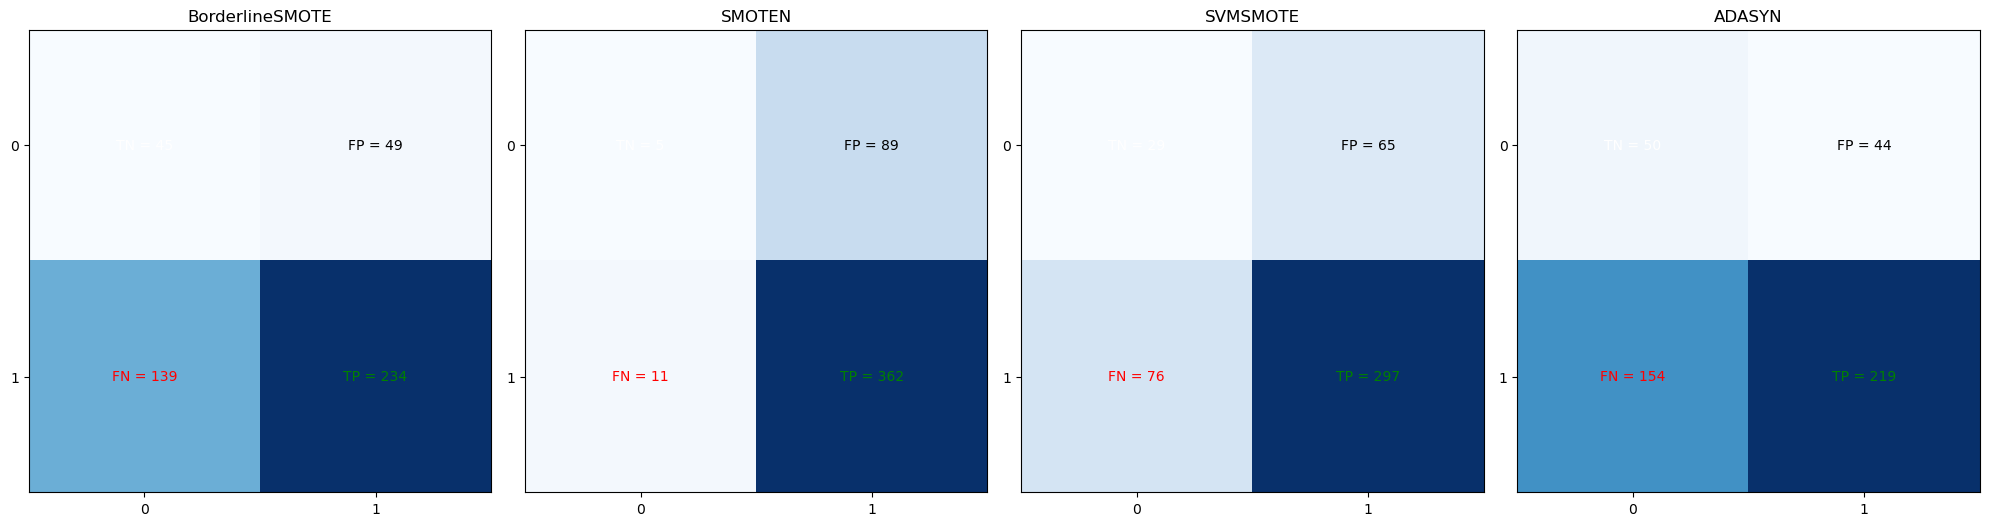

In [9]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import BorderlineSMOTE, SMOTEN, SVMSMOTE, KMeansSMOTE, ADASYN
import matplotlib.pyplot as plt

# List of SMOTE variations
smote_variations = [
    ('BorderlineSMOTE', BorderlineSMOTE(random_state=42, sampling_strategy='minority')),
    ('SMOTEN', SMOTEN(random_state=42, sampling_strategy='minority')),
    ('SVMSMOTE', SVMSMOTE(random_state=42, sampling_strategy='minority')),
    ('ADASYN', ADASYN(random_state=42, sampling_strategy='minority'))
]

# Define the parameter grid for GridSearchCV for Logistic Regression
log_param_grid = {
    'model__C': [0.1, 1, 10, 50, 100]
}

# Prepare subplots
fig, axes = plt.subplots(1, len(smote_variations), figsize=(20, 5))

# Loop through each SMOTE variation
for ax, (name, smote) in zip(axes, smote_variations):
    # Define the estimators for the Logistic Regression pipeline
    log_estimators = [
        ('normalize', StandardScaler()),  # Normalize the data
        ('minority', smote),  # Handle imbalanced data with selected SMOTE variation
        ('model', LogisticRegression(max_iter=1000))  # Logistic Regression model
    ]

    # Create the pipeline using imblearn's Pipeline
    log_pipe = ImbPipeline(log_estimators)

    # Create the GridSearchCV object
    log_grid = GridSearchCV(log_pipe, log_param_grid, cv=5)

    # Fit the grid search to the training data (ensure X_train and y_train are defined)
    log_fittedgrid = log_grid.fit(X_train, y_train)

    # Evaluate the best model on the test data (ensure X_test and y_test are defined)
    log_score = log_fittedgrid.score(X_test, y_test)

    # Make predictions using the best model
    y_pred = log_fittedgrid.predict(X_test)

    # Compute the confusion matrix
    cm = confusion_matrix(y_test, y_pred)

    report_initial = classification_report(y_test, y_pred)

    # Print the best parameters and score for Logistic Regression
    print(f"Results for {name}:")
    print("Best parameters for Logistic Regression: ", log_fittedgrid.best_params_)
    print("Best cross-validation score for Logistic Regression: {:.2f}".format(log_fittedgrid.best_score_))
    print("Test set score for Logistic Regression: {:.2f}".format(log_score))
    print("\nConfusion Matrix:\n", cm)
    print("\n")
    print("\nConfusion Report:\n", report_initial)
    print("\n")
    
    # Extract TP, TN, FP, FN
    tn, fp, fn, tp = cm.ravel()
       
    #Set the plot
    ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    ax.set_title(name)
    
    # Add labels to the plot
    classes = ['Negative', 'Positive']
    tick_marks = np.arange(len(classes))
    ax.set_xticks(tick_marks)
    ax.set_yticks(tick_marks)

    
    # Add TP, TN, FP, FN values to the plot
    ax.text(0, 0, f'TN = {tn}', ha='center', va='center', color='white')
    ax.text(1, 0, f'FP = {fp}', ha='center', va='center', color='black')
    ax.text(0, 1, f'FN = {fn}', ha='center', va='center', color='red')
    ax.text(1, 1, f'TP = {tp}', ha='center', va='center', color='green')     
    
    
#Display the plot
plt.tight_layout()
plt.show()


### Summary of SMOTE Variations
#### BorderlineSMOTE
- **Use Case:** Effective when the decision boundary is critical, and samples near the border are more informative.
- **Summary:** Generates synthetic samples only near the borderline instances, which are difficult to classify. This helps in improving the classifier's performance on challenging cases but might lead to higher false negatives.
#### SVMSMOTE

- **Use Case:** Useful when the decision boundary is complex, and SVM can help in identifying the support vectors that form the boundary.
- **Summary:** Uses Support Vector Machine (SVM) to identify the borderline instances and generate synthetic samples. Balances the data near the decision boundary, improving the model's ability to classify difficult instances correctly.
#### KMeansSMOTE

- **Use Case:** Suitable when the minority class has distinct sub-clusters, and generating samples within these clusters is beneficial.
- **Summary:** Applies KMeans clustering to find sub-clusters within the minority class and generates synthetic samples within these clusters. Helps in better representation of the minority class by preserving the cluster structure but might not always improve true positive rates significantly.
#### ADASYN

- **Use Case:** Ideal when dealing with highly imbalanced datasets where some minority instances are harder to learn.
- **Summary:** ADASYN (Adaptive Synthetic Sampling) focuses on generating more synthetic samples for minority instances that are harder to learn. It adaptively shifts the decision boundary towards the difficult instances, resulting in higher true positive rates but also increasing the number of false positives.

### Summary

Based on balancing precision, recall, and F1-score across classes, the Logistic Regression (Base) model remains the best performer. It has the highest accuracy (0.80) and excellent performance on class 1 (precision: 0.80, recall: 1.00, F1-score: 0.89). However, it struggles with class 0 predictions.

The SMOTEN approach shows promise with a high test score (0.79) and strong performance on class 1 but significantly underperforms on class 0.

The other SMOTE variants (BorderlineSMOTE, SVMSMOTE, ADASYN) show varied performance, but none outperform the base logistic regression in terms of overall balanced metrics.

### Decision Tree <a id='DT'></a>

In [11]:
from sklearn.tree import DecisionTreeClassifier

DT = DecisionTreeClassifier()
DT.fit(X_train, y_train)


print(f"The TRAIN classification accuracy is:  {DT.score(X_train,y_train)}")
print(f"The TEST classification accuracy is:  {DT.score(X_test,y_test)}")

The TRAIN classification accuracy is:  1.0
The TEST classification accuracy is:  0.7130620985010707


,Predicted Non-user,Predicted User
True Non-User,21,73
True User,61,312


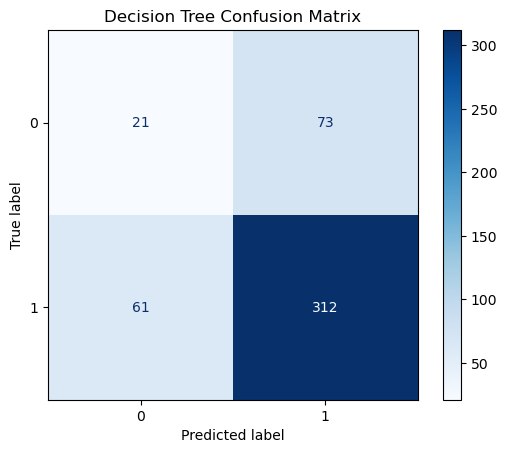

              precision    recall  f1-score   support

           0       0.26      0.22      0.24        94
           1       0.81      0.84      0.82       373

    accuracy                           0.71       467
   macro avg       0.53      0.53      0.53       467
weighted avg       0.70      0.71      0.71       467



In [12]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Get class predictions
y_pred1 = DT.predict(X_test)

# Generate confusion matrix
DT_matrix = confusion_matrix(y_test, y_pred1)

# label rows and columns
DT_df = pd.DataFrame(
    DT_matrix,
    columns=["Predicted Non-user", "Predicted User"],
    index=["True Non-User", "True User"]
)

display(DT_df)

# the function expects the estimator, inputs and target as parameters
# Evaluate the model
cm = confusion_matrix(y_test, y_pred1)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title("Decision Tree Confusion Matrix")
plt.show()

from sklearn.metrics import classification_report


report_initial_1 = classification_report(y_test, y_pred1)
print(report_initial_1)

#### Summary
The base Decision Tree model achieved perfect classification accuracy on the training set with a score of 1.0. However, on the test set, the classification accuracy dropped to 0.71. The precision, recall, and F1-score for class 1 (majority class) were 0.81, 0.84, and 0.82, respectively, indicating good performance in predicting the majority class. For class 0 (minority class), the precision, recall, and F1-score were 0.26, 0.22, and 0.24, respectively, demonstrating significantly poorer performance. The overall accuracy was 0.71, with a macro average and weighted average F1-score of 0.53 and 0.71, respectively. This model tends to overfit the training data and struggles with minority class predictions on the test set.

 ### Decision Tree and Random Forest with PCA <a id='DTRM'></a>

Best parameters for Decision Tree:  {'model__max_depth': 3, 'model__min_impurity_decrease': 0.01, 'model__min_samples_leaf': 1}
Best cross-validation score for Decision Tree: 0.83
Test set score for Decision Tree: 0.80
Best parameters for Random Forest:  {'model__max_depth': 5, 'model__min_samples_leaf': 8, 'model__min_samples_split': 5, 'model__n_estimators': 30}
Best cross-validation score for Random Forest: 0.83
Test set score for Random Forest: 0.80


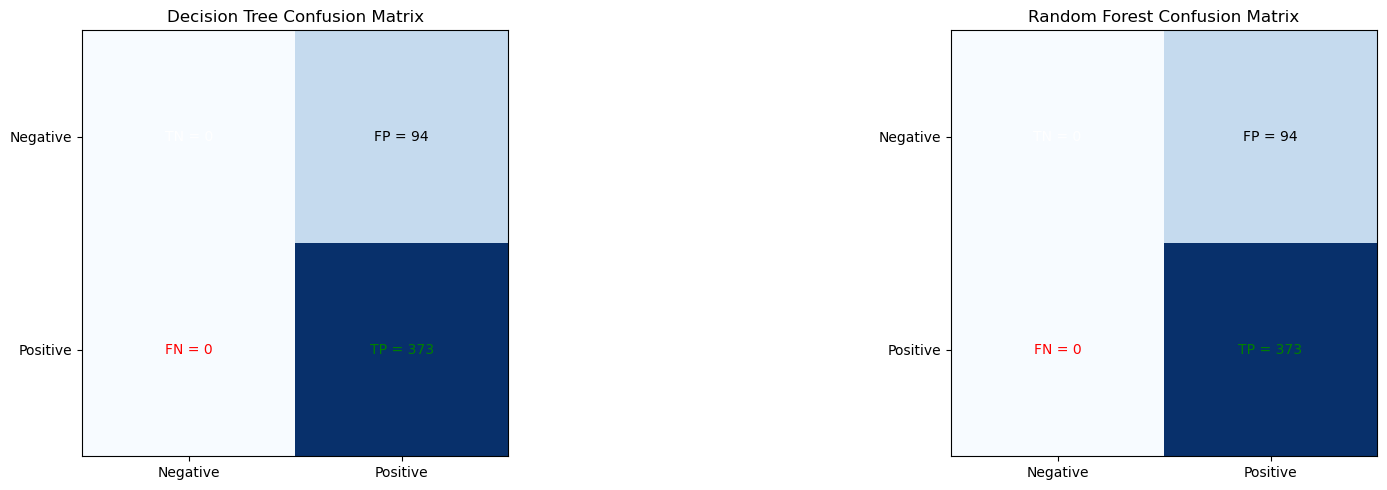

,Predicted Non-user,Predicted User
True Non-User,0,94
True User,0,373


,Predicted Non-user,Predicted User
True Non-User,0,94
True User,0,373



Decision Tree Confusion Matrix:
 [[  0  94]
 [  0 373]]

Random Forest Confusion Matrix:
 [[  0  94]
 [  0 373]]

Decision Tree Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        94
           1       0.80      1.00      0.89       373

    accuracy                           0.80       467
   macro avg       0.40      0.50      0.44       467
weighted avg       0.64      0.80      0.71       467


Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        94
           1       0.80      1.00      0.89       373

    accuracy                           0.80       467
   macro avg       0.40      0.50      0.44       467
weighted avg       0.64      0.80      0.71       467



/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.11/site-packages/sklearn/

In [13]:
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
from tempfile import mkdtemp
import matplotlib.pyplot as plt

# Create a temporary directory for caching the pipeline
cachedir = mkdtemp()

# Define the estimators for the Decision Tree pipeline
dt_estimators = [
    ('normalize', StandardScaler()),  # Normalize the data
    ('reduce_dim', PCA(n_components=20)),  # PCA with 10 components
    ('model', DecisionTreeClassifier())  # Decision Tree model
]

# Define the estimators for the Random Forest pipeline
rf_estimators = [
    ('normalize', StandardScaler()),  # Normalize the data
    ('reduce_dim', PCA(n_components=20)),  # PCA with 10 components
    ('model', RandomForestClassifier())  # Random Forest model
]

# Create the pipelines using scikit-learn's Pipeline
dt_pipe = Pipeline(dt_estimators, memory=cachedir)
rf_pipe = Pipeline(rf_estimators, memory=cachedir)

# Define the parameter grid for GridSearchCV for Decision Tree
dt_param_grid = {
    'model__max_depth': [3, 5, 7, 9, 11, 13, 21],
    'model__min_samples_leaf': [1, 5, 10, 20, 30, 40],
    'model__min_impurity_decrease': [0.0, 0.01, 0.05, 0.1]
}

# Define the parameter grid for GridSearchCV for Random Forest
rf_param_grid = {
    'model__n_estimators': [10, 30, 50, 100],  # Number of trees
    'model__max_depth': [5, 10, 15, 20, 30],  # Maximum depth
    'model__min_samples_split': [2, 5, 7, 10, 15],  # Minimum samples to split
    'model__min_samples_leaf': [1, 2, 4, 8, 10]  # Minimum samples per leaf
}

# Create the GridSearchCV objects
dt_grid = GridSearchCV(dt_pipe, dt_param_grid, cv=5)
rf_grid = GridSearchCV(rf_pipe, rf_param_grid, cv=5)

# Fit the grid search to the training data (ensure X_train and y_train are defined)
dt_fittedgrid = dt_grid.fit(X_train, y_train)
rf_fittedgrid = rf_grid.fit(X_train, y_train)

# Evaluate the best models on the test data (ensure X_test and y_test are defined)
dt_score = dt_fittedgrid.score(X_test, y_test)
rf_score = rf_fittedgrid.score(X_test, y_test)

# Print the best parameters and scores for Decision Tree
print("Best parameters for Decision Tree: ", dt_fittedgrid.best_params_)
print("Best cross-validation score for Decision Tree: {:.2f}".format(dt_fittedgrid.best_score_))
print("Test set score for Decision Tree: {:.2f}".format(dt_score))

# Print the best parameters and scores for Random Forest
print("Best parameters for Random Forest: ", rf_fittedgrid.best_params_)
print("Best cross-validation score for Random Forest: {:.2f}".format(rf_fittedgrid.best_score_))
print("Test set score for Random Forest: {:.2f}".format(rf_score))


# Make predictions using the best models
dt_predictions = dt_fittedgrid.predict(X_test)
rf_predictions = rf_fittedgrid.predict(X_test)

# Compute confusion matrices
dt_cm = confusion_matrix(y_test, dt_predictions)
rf_cm = confusion_matrix(y_test, rf_predictions)

# Plot the confusion matrices side by side
fig, axes = plt.subplots(1, 2, figsize=(20, 5))

# Decision Tree Confusion Matrix
axes[0].imshow(dt_cm, interpolation='nearest', cmap=plt.cm.Blues)
axes[0].set_title('Decision Tree Confusion Matrix')

# Extract TP, TN, FP, FN for Decision Tree
tn, fp, fn, tp = dt_cm.ravel()

# Add TP, TN, FP, FN values to the Decision Tree plot
axes[0].text(0, 0, f'TN = {tn}', ha='center', va='center', color='white')
axes[0].text(1, 0, f'FP = {fp}', ha='center', va='center', color='black')
axes[0].text(0, 1, f'FN = {fn}', ha='center', va='center', color='red')
axes[0].text(1, 1, f'TP = {tp}', ha='center', va='center', color='green')

# Random Forest Confusion Matrix
axes[1].imshow(rf_cm, interpolation='nearest', cmap=plt.cm.Blues)
axes[1].set_title('Random Forest Confusion Matrix')

# Extract TP, TN, FP, FN for Random Forest
tn1, fp1, fn1, tp1 = rf_cm.ravel()

# Add TP, TN, FP, FN values to the Random Forest plot
axes[1].text(0, 0, f'TN = {tn1}', ha='center', va='center', color='white')
axes[1].text(1, 0, f'FP = {fp1}', ha='center', va='center', color='black')
axes[1].text(0, 1, f'FN = {fn1}', ha='center', va='center', color='red')
axes[1].text(1, 1, f'TP = {tp1}', ha='center', va='center', color='green')

# Add labels to the plot
classes = ['Negative', 'Positive']
tick_marks = np.arange(len(classes))
for ax in axes:
    ax.set_xticks(tick_marks)
    ax.set_yticks(tick_marks)
    ax.set_xticklabels(classes)
    ax.set_yticklabels(classes)

# Display the plot
plt.tight_layout()
plt.show()

# DT label rows and columns
DT_df = pd.DataFrame(
    dt_cm,
    columns=["Predicted Non-user", "Predicted User"],
    index=["True Non-User", "True User"]
)

# RF label rows and columns
RF_df = pd.DataFrame(
    rf_cm,
    columns=["Predicted Non-user", "Predicted User"],
    index=["True Non-User", "True User"]
)

# Display confusion matrices as dataframes
display(DT_df)
display(RF_df)

print("\nDecision Tree Confusion Matrix:\n", dt_cm)
print("\nRandom Forest Confusion Matrix:\n", rf_cm)

# Print classification reports
dt_class_report = classification_report(y_test, dt_predictions)
rf_class_report = classification_report(y_test, rf_predictions)

print("\nDecision Tree Classification Report:\n", dt_class_report)
print("\nRandom Forest Classification Report:\n", rf_class_report)


#### Summary:
Decision Tree:
The best parameters for the Decision Tree were determined to be max_depth of 3, min_impurity_decrease of 0.01, and min_samples_leaf of 1. This configuration achieved a best cross-validation score of 0.83 and a test set score of 0.80. The classification report shows a precision, recall, and F1-score of 0.00 for class 0 (minority class), indicating that the model completely fails to predict this class. For class 1 (majority class), the precision, recall, and F1-score are 0.80, 1.00, and 0.89, respectively. The overall accuracy is 0.80, with a macro average F1-score of 0.44 and a weighted average F1-score of 0.71, highlighting the model's difficulty in handling the minority class.

Random Forest:
The optimal parameters for the Random Forest model included max_depth of 5, min_samples_leaf of 8, min_samples_split of 5, and n_estimators of 30. This model also achieved a best cross-validation score of 0.83 and a test set score of 0.80. Similar to the Decision Tree, the classification report for the Random Forest shows a precision, recall, and F1-score of 0.00 for class 0, indicating a complete failure to predict the minority class. For class 1, the precision, recall, and F1-score are 0.80, 1.00, and 0.89, respectively. The overall accuracy is 0.80, with a macro average F1-score of 0.44 and a weighted average F1-score of 0.71, demonstrating that this model also struggles with minority class predictions despite its slightly more complex structure.

Both models exhibit high performance for the majority class but fail to adequately predict the minority class, highlighting the need for better handling of imbalanced data.

### Model Comparison <a id='Models'></a>

In [15]:
# Create an empty dataframe to store the metrics
metrics_df = pd.DataFrame(columns=['Hyperparameter', 'Training Accuracy', 'Test Accuracy', 'Notes'])

# Logistic Regression baseline
metrics_df.loc['Logistic Regression (Base)'] = ['nan', '83%', '80%', 'High accuracy but fails to predict minority class (0)']

# Logistic Regression with SMOTE variations
metrics_df.loc['BorderlineSMOTE'] = ['C=0.1', '63%', '60%', 'Improved recall for minority class (0.48) but lower overall accuracy']
metrics_df.loc['SMOTEN'] = ['C=10', '81%', '79%', 'High accuracy but fails to predict minority class (0.05)']
metrics_df.loc['SVMSMOTE'] = ['C=1', '73%', '70%', 'Balanced precision and recall, moderate improvement in minority class handling (0.31)']
metrics_df.loc['ADASYN'] = ['C=0.1', '59%', '58%', 'Improved recall for minority class (0.53) but lower overall accuracy']

# Decision Tree baseline and tuned
metrics_df.loc['Decision Tree (Base)'] = ['nan', '100%', '71%', 'High training accuracy, but low recall for minority class (0.22)']
metrics_df.loc['Decision Tree (Tuned)'] = ['max_depth=3, min_impurity_decrease=0.01, min_samples_leaf=1', '83%', '80%', 'High accuracy but fails to predict minority class (0.00)']

# Random Forest tuned
metrics_df.loc['Random Forest'] = ['max_depth=5, min_samples_leaf=8, min_samples_split=5, n_estimators=30', '83%', '80%', 'High accuracy but fails to predict minority class (0.00)']

# Display the dataframe
metrics_df


,Hyperparameter,Training Accuracy,Test Accuracy,Notes
Logistic Regression (Base),nan,83%,80%,High accuracy but fails to predict minority cl...
BorderlineSMOTE,C=0.1,63%,60%,Improved recall for minority class (0.48) but ...
SMOTEN,C=10,81%,79%,High accuracy but fails to predict minority cl...
SVMSMOTE,C=1,73%,70%,"Balanced precision and recall, moderate improv..."
ADASYN,C=0.1,59%,58%,Improved recall for minority class (0.53) but ...
Decision Tree (Base),nan,100%,71%,"High training accuracy, but low recall for min..."
Decision Tree (Tuned),"max_depth=3, min_impurity_decrease=0.01, min_s...",83%,80%,High accuracy but fails to predict minority cl...
Random Forest,"max_depth=5, min_samples_leaf=8, min_samples_s...",83%,80%,High accuracy but fails to predict minority cl...


### Conclusion:

**Best Performing Model:** 
Logistic Regression (Base), Tuned Decision Tree, and Tuned Random Forest all have the same test accuracy of 80%. However, considering the balance between overall accuracy and the ability to predict the minority class, Logistic Regression with SVMSMOTE stands out with an overall accuracy of 70% and a reasonable recall for the minority class (0.31). Thus, Logistic Regression with SVMSMOTE could be considered the best performing model among the ones evaluated, as it maintains a better balance between overall accuracy and minority class prediction.

# INDEX
- [Logistic Regression](#logreg)
- [Coefficient analysis](#Coef)
- [Logistic Regression with SMOTE variations and Confusion Matrix](#logreg_smote)
- [Decision Tree](#DT)
- [Decision Tree and Random Forest with PCA](#DTRM)
- [Models Comparison](#Models)
<a id='INDEX'></a>